## Data loading

Sources: 
- https://physionet.org/content/ptb-xl/1.0.3/


The code comes with a script to load the data, I have taken inspiration from most of it https://physionet.org/content/ptb-xl/1.0.3/example_physionet.py

In [1]:
from data_loading_utils import load_data_from_directory

X, Y, df = load_data_from_directory("data/", sampling_rate=100)

In [6]:
from data_loading_utils import get_train_test_split

# Assuming X and Y have been loaded using the previous functions

# Get train and test splits
X_train, X_test, y_train, y_test = get_train_test_split(X, Y, test_fold=10)

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# # If you also want to get validation splits
# X_train, X_test, y_train, y_test, X_val, y_val = get_train_test_split(X, Y, test_fold=10, validation=True)

# # Print shapes of the datasets including validation
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)
# print("X_val shape:", X_val.shape)
# print("y_val shape:", y_val.shape)


X_train shape: (15245, 1000, 12)
X_test shape: (2198, 1000, 12)
y_train shape: (15245,)
y_test shape: (2198,)


In [7]:
import pandas as pd

# Path to the data, I have just included the whole directory that you download under data
path = './data/'

patient_data = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')

print(patient_data.head())

patient_data.to_csv('patient_data.csv', index=True)


        patient_id   age  sex  height  weight  nurse  site     device  \
ecg_id                                                                  
1          15709.0  56.0    1     NaN    63.0    2.0   0.0  CS-12   E   
2          13243.0  19.0    0     NaN    70.0    2.0   0.0  CS-12   E   
3          20372.0  37.0    1     NaN    69.0    2.0   0.0  CS-12   E   
4          17014.0  24.0    0     NaN    82.0    2.0   0.0  CS-12   E   
5          17448.0  19.0    1     NaN    70.0    2.0   0.0  CS-12   E   

             recording_date                                  report  ...  \
ecg_id                                                               ...   
1       1984-11-09 09:17:34  sinusrhythmus periphere niederspannung  ...   
2       1984-11-14 12:55:37     sinusbradykardie sonst normales ekg  ...   
3       1984-11-15 12:49:10              sinusrhythmus normales ekg  ...   
4       1984-11-15 13:44:57              sinusrhythmus normales ekg  ...   
5       1984-11-17 10:43:15     

In [4]:
X_train.shape

(15245, 1000, 12)

## Plotting data

Below I am trying to plot using ecg_plot, if we try using the default ecg_plot_12 the function breaks but it mysteriously works with plot 1. Must be something I am missing with the shapes.

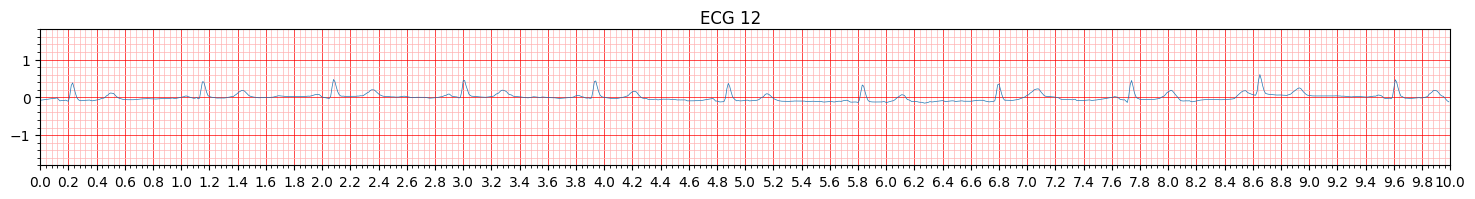

In [23]:
import ecg_plot
# Fucked output for plot 12 but we can go over each lead to plot it.

{}
ecg_plot.plot_1(X_train[0][:, 0], sample_rate = 100, title = 'ECG 12')


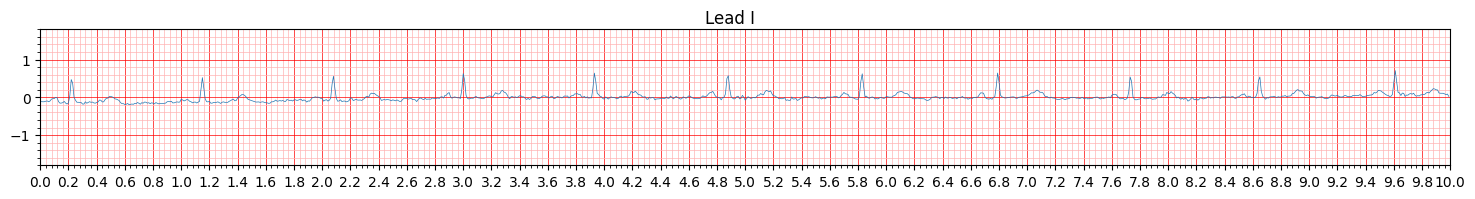

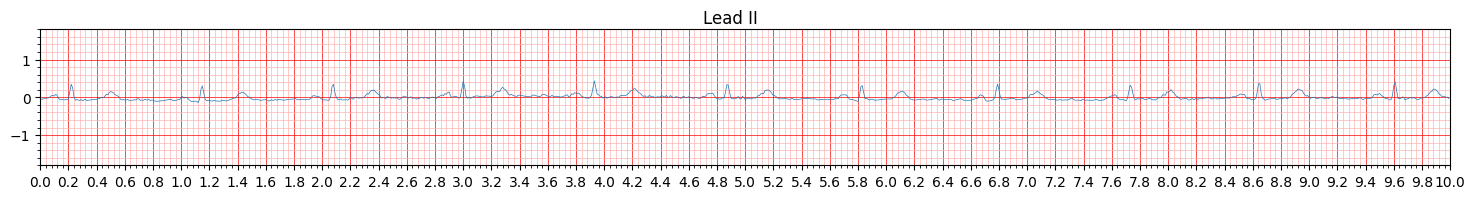

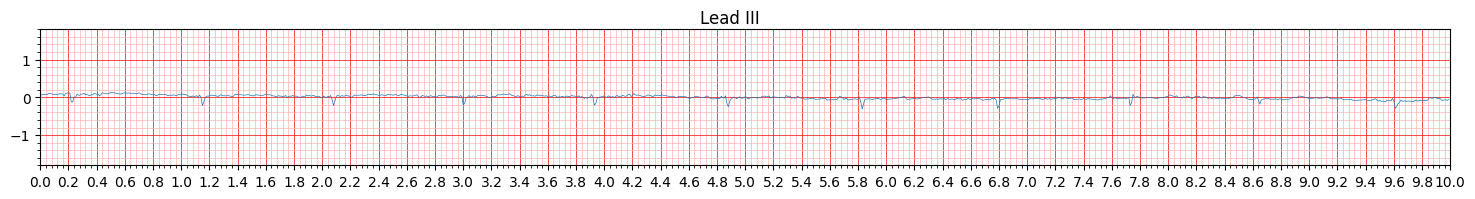

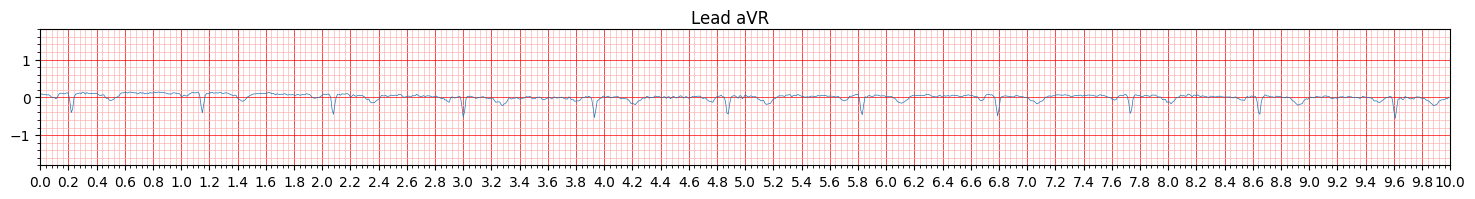

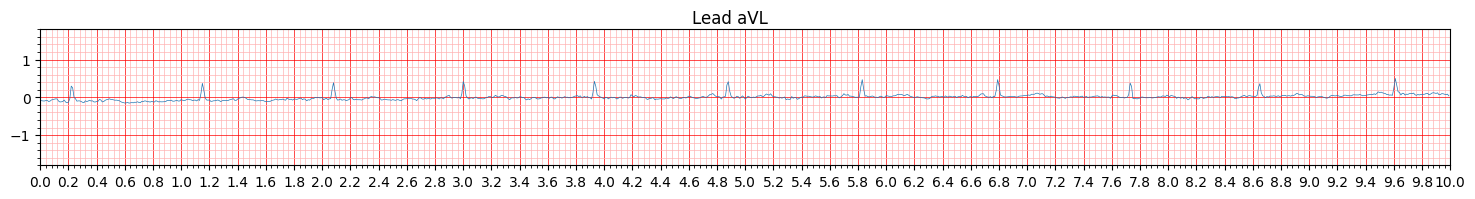

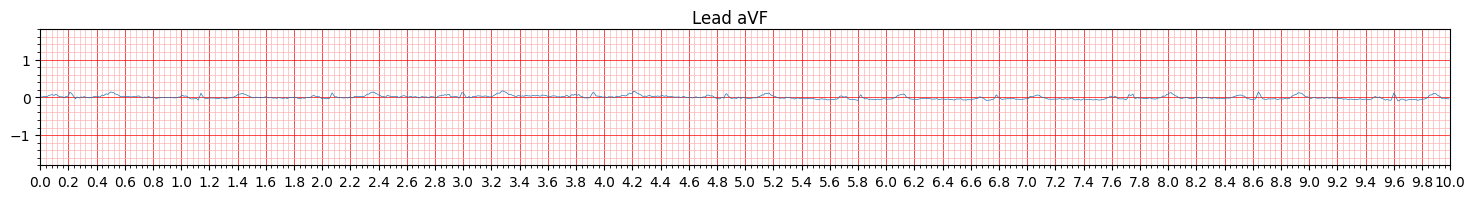

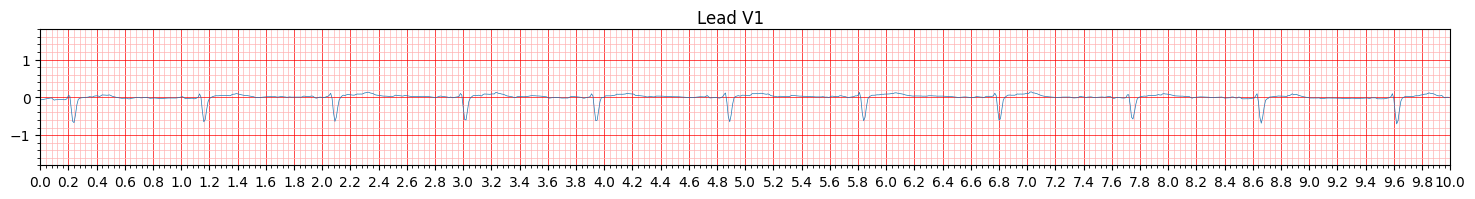

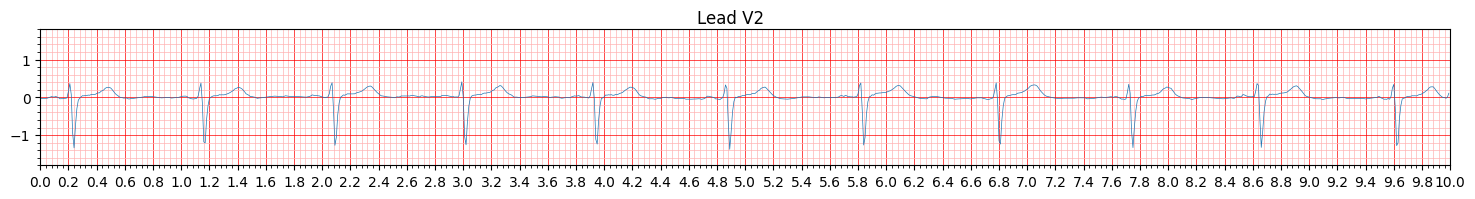

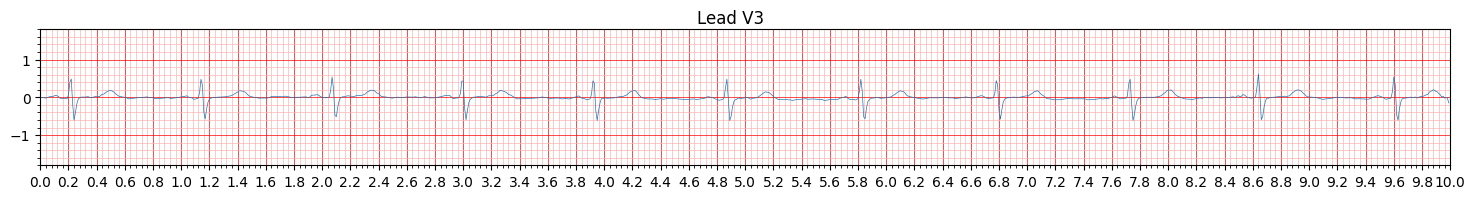

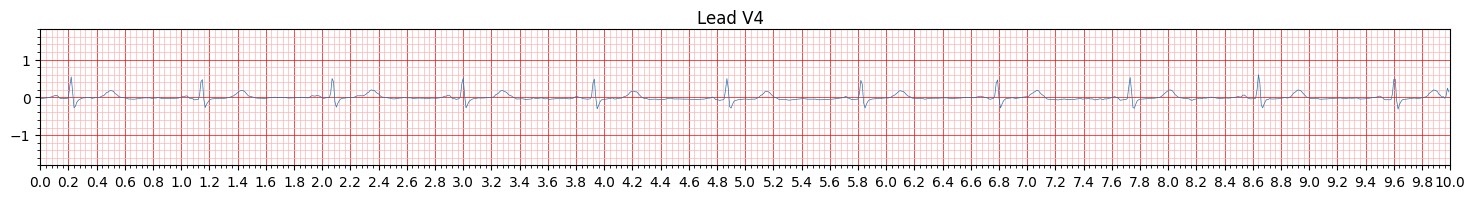

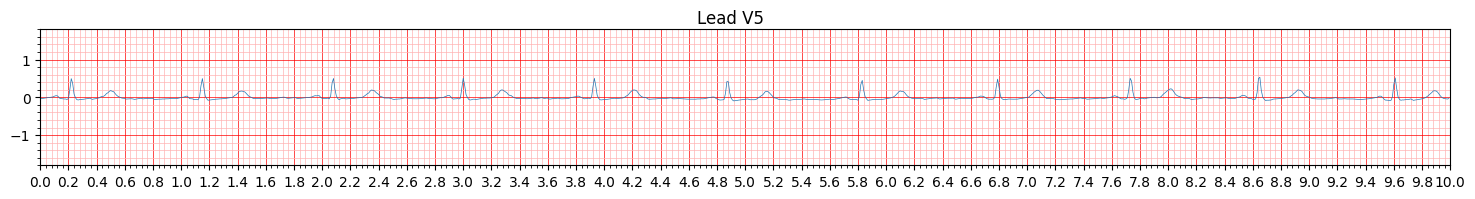

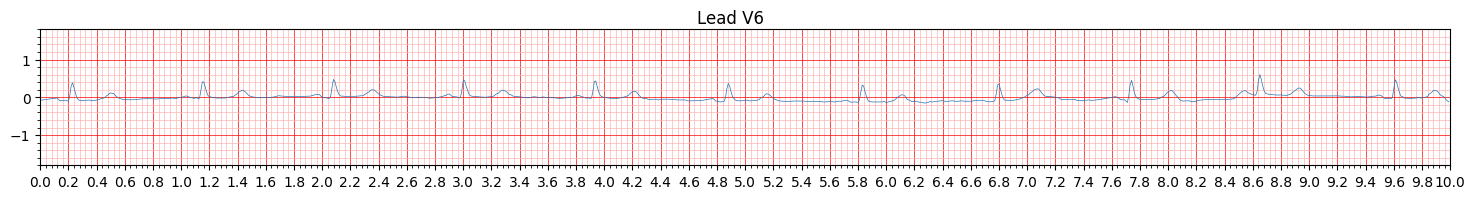

In [25]:
import ecg_plot

# Note I am not sure that this is the mapping, this is just an exploration.

# But I think it could be beause of this statement
# 1. Raw signal data was recorded and stored in a proprietary compressed format. For all signals, we provide the standard set of 12 leads (I, II, III, AVL, AVR, AVF, V1, ..., V6) with reference electrodes on the right arm.

lead_mapping = {
    'I': 0,
    'II': 1,
    'III': 2,
    'aVR': 3,
    'aVL': 4,
    'aVF': 5,
    'V1': 6,
    'V2': 7,
    'V3': 8,
    'V4': 9,
    'V5': 10,
    'V6': 11
}

# Manually choose the patient number
PATIENT_INDEX = 0

# Plot each lead individually
for lead_name, lead_index in lead_mapping.items():
    ecg_plot.plot_1(X_train[PATIENT_INDEX][:, lead_index], sample_rate=100, title=f'Lead {lead_name}')
    ecg_plot.show()

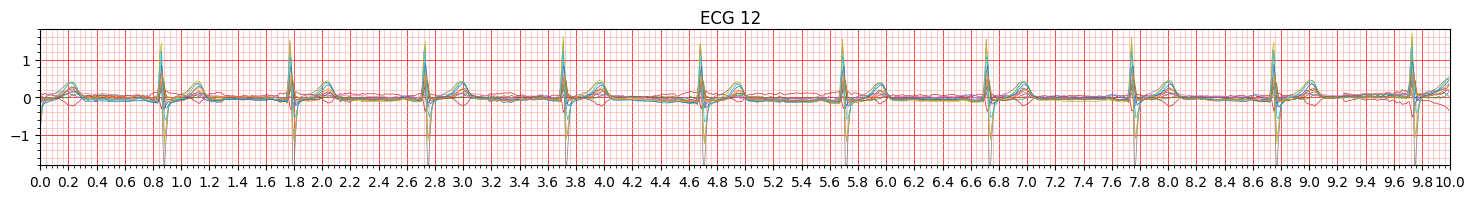

In [14]:
import ecg_plot

#Not so fucked, we have the 10 seconds but all of the channels are overlapped.
ecg_plot.plot_1(X_test[0], sample_rate = 100, title = 'ECG 12')

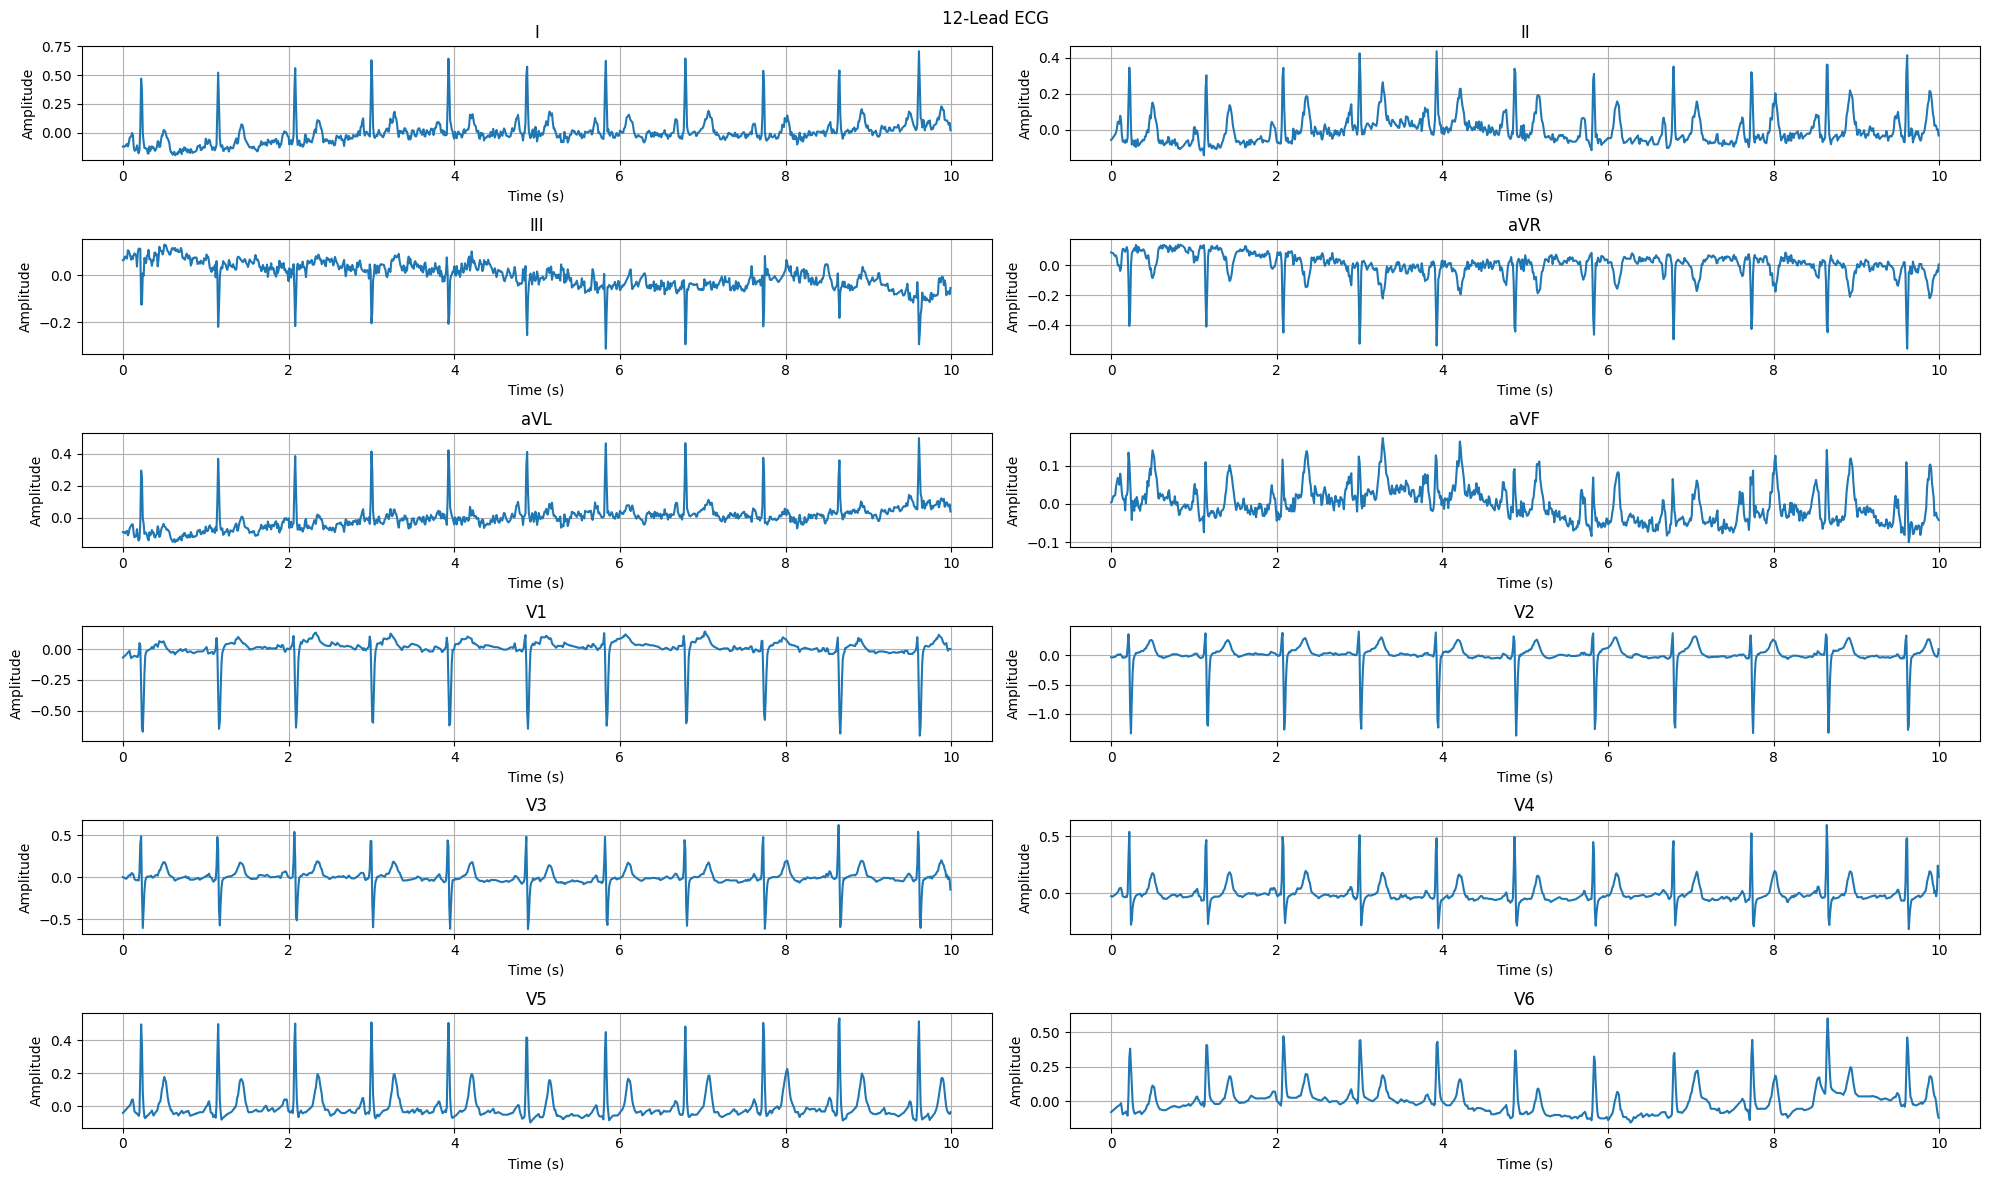

In [15]:
import matplotlib.pyplot as plt
import numpy as np

sampling_rate = 100

def plot_12_lead_ecg(ecg_signal, title="12-Lead ECG"):
    """
    Plot a 12-lead ECG signal.

    Parameters:
    - ecg_signal: numpy array of shape (time_steps, 12)
    - title: title of the plot
    """
    leads = [
        'I', 'II', 'III', 'aVR', 'aVL', 'aVF',
        'V1', 'V2', 'V3', 'V4', 'V5', 'V6'
    ]

    time_steps = ecg_signal.shape[0]
    time = np.arange(time_steps) / sampling_rate  # Adjust time axis based on sampling rate

    plt.figure(figsize=(20, 12))

    for i in range(12):
        plt.subplot(6, 2, i + 1)
        plt.plot(time, ecg_signal[:, i], label=leads[i])
        plt.title(leads[i])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.tight_layout()

    plt.suptitle(title)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Cheap plots courtesy of GPT
plot_12_lead_ecg(X_train[0])


In [9]:
X_train[0].shape

(1000, 12)

## Alternative: Manual plotting 

In [29]:

def plot_12_leads_one_patient(patient_vector):
    # Get the first patient's ECG data
    print("Shape of first patient's ECG data:", patient_vector.shape)

    # Define the lead names
    lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

    # Standardized ECG paper-like settings
    def create_ecg_plot(ax, data, title, sampling_rate):
        times = np.arange(data.shape[0]) / sampling_rate
        ax.plot(times, data, color='black', linewidth=0.75)
        ax.set_title(title)
        ax.set_xlabel('Time (seconds)')
        ax.set_ylabel('mV')
        ax.grid(which='both', linestyle='-', color='grey')
        ax.set_xticks(np.arange(0, times[-1] + 1, 1))  # Mark only full seconds
        ax.set_xticks(np.arange(0, times[-1] + 0.2, 0.2), minor=True)
        ax.set_yticks(np.arange(-1, 1.5, 0.5))
        ax.set_yticks(np.arange(-1, 1.5, 0.1), minor=True)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))  # Show only full seconds
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: '{:.1f}'.format(y)))
        ax.grid(which='major', color='red', linewidth=0.5)
        ax.grid(which='minor', color='red', linewidth=0.2)

    fig, axs = plt.subplots(6, 2, figsize=(15, 20))
    fig.suptitle('12-Lead ECG', fontsize=16)

    for i, ax in enumerate(axs.flat):
        create_ecg_plot(ax, first_patient_ecg[:, i], f'Lead {lead_names[i]}', sampling_rate)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Shape of first patient's ECG data: (1000, 12)


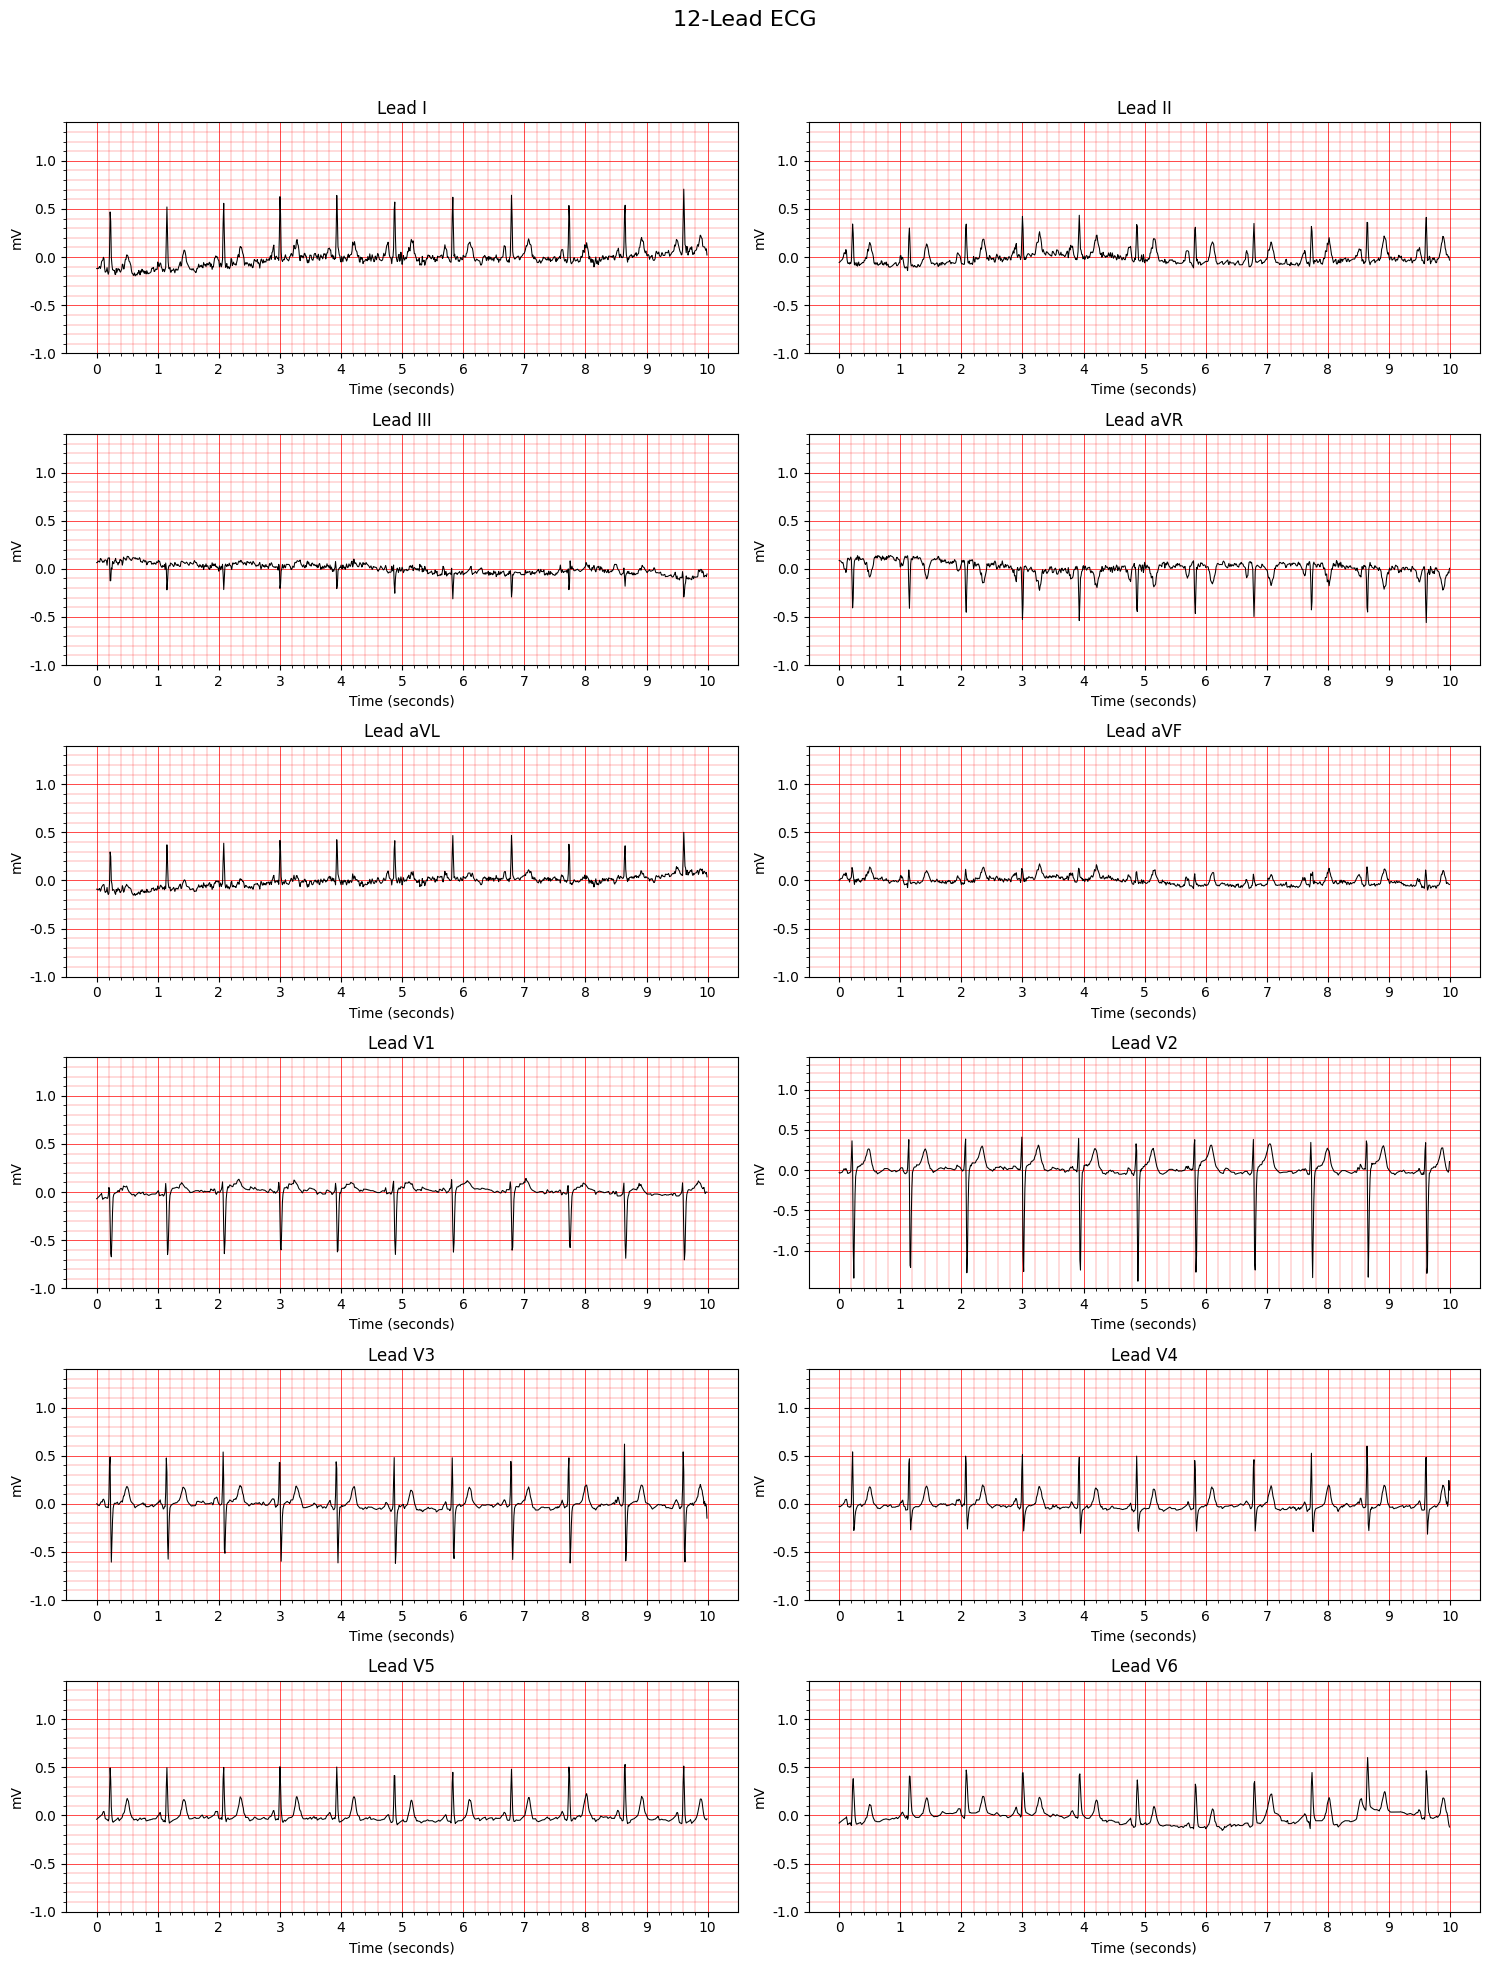

In [31]:
plot_12_leads_one_patient(X_train[100])